In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf 
import warnings 
import seaborn as sns
import time 
import datetime
# Ignore all warnings
warnings.filterwarnings('ignore')
import oandapyV20
import oandapyV20.endpoints.instruments as instruments


In [24]:
# OANDA API credentials
api_token = '4774a622bc314440290f530efcc46453-eb96728988593ba944d5285fbcf8786a'
account_id = '101-001-8028197-001'

# OANDA API connection
api = oandapyV20.API(access_token=api_token)

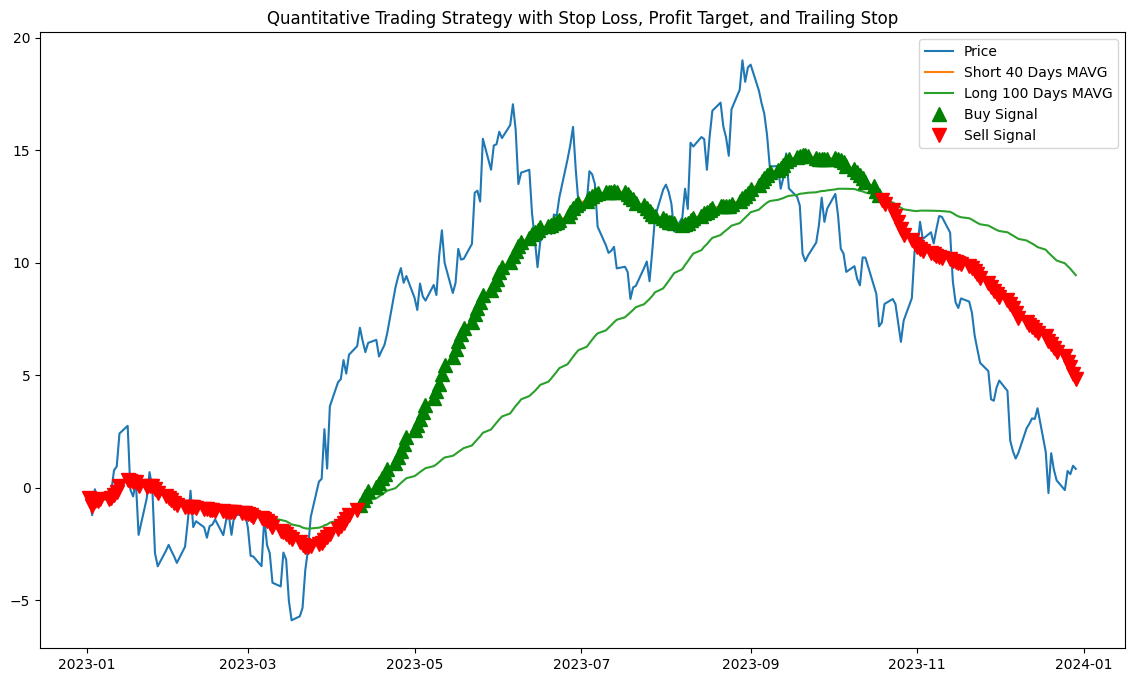

In [25]:


# Define parameters
short_window = 40
long_window = 100
stop_loss_percent = 0.02
profit_target_percent = 0.03
trailing_stop_percent = 0.01

# Calculate moving averages
df['short_mavg'] = df['price'].rolling(window=short_window, min_periods=1, center=False).mean()
df['long_mavg'] = df['price'].rolling(window=long_window, min_periods=1, center=False).mean()

# Initialize trading signals
df['signal'] = 0.0

# Generate signals based on moving average crossover
df['signal'][short_window:] = np.where(df['short_mavg'][short_window:] > df['long_mavg'][short_window:], 1.0, 0.0)

# Calculate daily percent returns
df['returns'] = df['price'].pct_change()

# Implement stop loss, profit target, and trailing stop
df['position'] = 0
df['stop_loss'] = 0.0
df['profit_target'] = 0.0
df['trailing_stop'] = 0.0

for i in range(1, len(df)):
    if df['signal'][i] == 1.0:
        df['position'][i] = 1
        df['stop_loss'][i] = df['price'][i] * (1 - stop_loss_percent)
        df['profit_target'][i] = df['price'][i] * (1 + profit_target_percent)
    elif df['position'][i-1] == 1:
        df['trailing_stop'][i] = max(df['stop_loss'][i-1], df['trailing_stop'][i-1] - trailing_stop_percent * df['price'][i-1])
        if df['price'][i] <= df['trailing_stop'][i]:
            df['position'][i] = 0

# Plot the strategy
plt.figure(figsize=(14, 8))
plt.plot(df['price'], label='Price')
plt.plot(df['short_mavg'], label=f'Short {short_window} Days MAVG')
plt.plot(df['long_mavg'], label=f'Long {long_window} Days MAVG')

# Plot entry and exit points
plt.plot(df[df['signal'] == 1.0].index, df['short_mavg'][df['signal'] == 1.0], '^', markersize=10, color='g', label='Buy Signal')
plt.plot(df[df['position'] == 0].index, df['short_mavg'][df['position'] == 0], 'v', markersize=10, color='r', label='Sell Signal')

plt.title('Quantitative Trading Strategy with Stop Loss, Profit Target, and Trailing Stop')
plt.legend()
plt.show()


In [29]:
# Filtering the DataFrame
buy_df = df[df['position'].isin(['1'])]
# Displaying the result
display(buy_df)




# Drop null values 
df = df.dropna()
display(df)

,price,short_mavg,long_mavg,signal,returns,position,stop_loss,profit_target,trailing_stop


,price,short_mavg,long_mavg,signal,returns,position,stop_loss,profit_target,trailing_stop
2023-01-03,-1.227433,-0.840625,-0.840625,0.0,1.704686,0,0.0,0.0,0.0
2023-01-04,-0.074104,-0.585118,-0.585118,0.0,-0.939627,0,0.0,0.0,0.0
2023-01-05,-0.576391,-0.582936,-0.582936,0.0,6.778124,0,0.0,0.0,0.0
2023-01-06,-0.305962,-0.527541,-0.527541,0.0,-0.469176,0,0.0,0.0,0.0
2023-01-09,-0.523936,-0.526941,-0.526941,0.0,0.712421,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2023-12-25,-0.113353,5.834807,9.970755,0.0,-1.355968,0,0.0,0.0,0.0
2023-12-26,0.738964,5.590537,9.845295,0.0,-7.519115,0,0.0,0.0,0.0
2023-12-27,0.594236,5.339125,9.727393,0.0,-0.195853,0,0.0,0.0,0.0
2023-12-28,0.970341,5.068113,9.583819,0.0,0.632923,0,0.0,0.0,0.0
